
# 🧪 Clinical Trial: Hipponol Intervention Study

This notebook explores data from a simulated 2-year clinical trial testing the effects of a novel nutrient, **Hipponol**, on blood pressure and survival.

## Study Design

- **Population**: 500 participants, aged 40–70, male/female, smokers and non-smokers.
- **Design**: Randomised controlled trial (RCT), 1:1 allocation to Hipponol vs. placebo.
- **Blinding**: Double-blind.
- **Duration**: 2-year follow-up.
- **Outcomes**:
  - **Primary**: Survival at 2 years.
  - **Secondary**: Change in systolic blood pressure (SBP) from baseline to follow-up.

## Analysis Plan

This notebook will follow key elements of the **CONSORT guidelines** for RCT reporting.

### 🔍 Descriptive Analysis (Baseline)

- Generate a **Table 1** comparing baseline characteristics (age, sex, smoking status, baseline SBP) between groups.
- Use appropriate statistical tests:
  - Continuous variables: t-test or Mann–Whitney U
  - Categorical variables: Chi-squared test

### 📉 Outcome Analysis

#### 1. Frequentist Approach

- **Survival**:
  - Logistic regression
  - Kaplan–Meier survival curves by group.
  - Log-rank test and Cox proportional hazards model.


- **Blood Pressure**:
  - Compare change in SBP using paired and unpaired t-tests.
  - Adjust for baseline covariates using linear regression.


#### 2. Bayesian Approach

- Logistic regression 
- Estimate group differences in SBP change using Bayesian linear models.
- Report posterior means, 95% credible intervals, and probability of benefit.

### 📌 Notes

- Missing data handling: listwise deletion for simplicity.
- Sensitivity analyses optional (not shown in basic notebook).
- Assumptions for all statistical models will be checked.

<details>
<summary>🦛 Fun Fact</summary>
The nutrient Hipponol is purely fictional—but if hippos had trials, we bet they'd run them by CONSORT too!
</details>


In [ ]:
# Setup for Google Colab: Fetch datasets automatically or manually
import os
from google.colab import files

# Define the module and dataset for this notebook
MODULE = '10_mini_projects'  
DATASET = 'hipponol_trial_data.csv'
BASE_PATH = '/content/data-analysis-toolkit-FNS'
MODULE_PATH = os.path.join(BASE_PATH, 'notebooks', MODULE)
DATASET_PATH = os.path.join('data', DATASET)

# Step 1: Attempt to clone the repository (automatic method)
# Note: If you encounter a cloning error (e.g., 'fatal: destination path already exists'),
#       reset the runtime (Runtime > Restart runtime) and run this cell again.
try:
    print('Attempting to clone repository...')
    if os.path.exists(BASE_PATH):
        print('Repository already exists, skipping clone.')
    else:
        !git clone https://github.com/ggkuhnle/data-analysis-toolkit-FNS.git
    
    # Debug: Print directory structure
    print('Listing repository contents:')
    !ls {BASE_PATH}
    print(f'Listing notebooks directory contents:')
    !ls {BASE_PATH}/notebooks
    
    # Check if the module directory exists
    if not os.path.exists(MODULE_PATH):
        raise FileNotFoundError(f'Module directory {MODULE_PATH} not found. Check the repository structure.')
    
    # Set working directory to the notebook's folder
    os.chdir(MODULE_PATH)
    
    # Verify dataset is accessible
    if os.path.exists(DATASET_PATH):
        print(f'Dataset found: {DATASET_PATH} 🦛')
    else:
        print(f'Error: Dataset {DATASET} not found after cloning.')
        raise FileNotFoundError
except Exception as e:
    print(f'Cloning failed: {e}')
    print('Falling back to manual upload option...')

    # Step 2: Manual upload option
    print(f'Please upload {DATASET} manually.')
    print(f'1. Click the "Choose Files" button below.')
    print(f'2. Select {DATASET} from your local machine.')
    print(f'3. Ensure the file is placed in notebooks/{MODULE}/data/')
    
    # Create the data directory if it doesn't exist
    os.makedirs('data', exist_ok=True)
    
    # Prompt user to upload the dataset
    uploaded = files.upload()
    
    # Check if the dataset was uploaded
    if DATASET in uploaded:
        with open(DATASET_PATH, 'wb') as f:
            f.write(uploaded[DATASET])
        print(f'Successfully uploaded {DATASET} to {DATASET_PATH} 🦛')
    else:
        raise FileNotFoundError(f'Upload failed. Please ensure you uploaded {DATASET}.')

# Install required packages for this notebook
%pip install pandas numpy
print('Python environment ready.')

SyntaxError: EOL while scanning string literal (2348161960.py, line 7)

# 🛠️ Step 1: Setting Up Python for the Hipponol Trial

This section ensures you're ready to run the analyses in Google Colab or a local environment.

## ✅ Requirements


You need the following Python packages:
- `pandas`
- `numpy`
- `matplotlib`
- `scipy`
- `lifelines` (for survival analysis)
- `cmdstanpy` (for Bayesian analysis, optional)


In [ ]:
# Setup

%pip install lifelines
%pip install pymc
%pip install arviz

# Import libraries for data manipulation, visualisation, and statistical analysis
import pandas as pd            # For data manipulation and analysis
import numpy as np             # For numerical operations
import matplotlib.pyplot as plt # For plotting
import seaborn as sns          # For enhanced statistical visualisations
from scipy.stats import ttest_ind, chi2_contingency  # For hypothesis testing

# Import Bayesian modelling and visualisation libraries
import pymc as pm              # For Bayesian statistical modelling
import arviz as az             # For Bayesian inference visualisation



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# 📊 Baseline Comparison: Table 1

This section generates a **Table 1** summary of participant characteristics by study group (Hipponol vs Control), including:

- Means and standard deviations for continuous variables  
- Frequencies and percentages for categorical variables  
- Statistical comparison (t-test or chi-squared)  

In [13]:
# Load the dataset (adjust path as needed)
df = pd.read_csv("data/hipponol_trial_data.csv")

# Create a copy to avoid modifying original
df1 = df.copy()

# Display first few rows
df1.head()


,ID,Age,Sex,SmokingStatus,Group,Baseline_SBP,Baseline_DBP,Followup_SBP,Followup_DBP,Survival
0,1,46,Male,Non-smoker,Control,130.3,86.9,142.3,77.5,1
1,2,59,Male,Non-smoker,Control,136.7,84.0,132.7,86.9,1
2,3,68,Female,Smoker,Control,116.2,88.7,102.2,86.7,1
3,4,54,Female,Smoker,Hipponol,174.1,99.0,166.6,102.1,1
4,5,50,Female,Smoker,Hipponol,124.0,65.1,114.9,62.8,1


## 🔍 Table 1: Summary Function

This cell builds a summary table comparing baseline characteristics across treatment groups using **standard Python libraries**:

- **Numerical variables** (e.g., age, baseline BP) are compared using independent t-tests. We report mean ± standard deviation.
- **Categorical variables** (e.g., gender, smoker) are compared using chi-squared tests, and shown as counts with percentages.

The function `create_table1()`:

- Takes the dataset and grouping column (e.g., "`group`") as input.
- Returns a DataFrame summarising each variable by group, along with p-values for between-group comparisons.

This approach is useful when you want:

- Full control over what’s included in the table.
- Clear, interpretable formatting for reports or publications.

To avoid installing additional packages (e.g., tableone).

🛠️ This method aligns with **CONSORT guidelines** for reporting baseline characteristics.

In [14]:
def create_table1_clean(data, group_col):
    """Create a clean Table 1: baseline characteristics by group."""
    if group_col not in data.columns:
        raise KeyError(f"Grouping column '{group_col}' not found in DataFrame.")
    
    group_names = data[group_col].unique()
    if len(group_names) != 2:
        raise ValueError("This function currently supports exactly two groups.")

    group1, group2 = group_names
    summary = []

    numeric_cols = ['Age', 'Baseline_SBP']
    cat_cols = ['Sex', 'SmokingStatus']

    # Continuous variables
    for col in numeric_cols:
        vals1 = data[data[group_col] == group1][col].dropna()
        vals2 = data[data[group_col] == group2][col].dropna()
        mean1, std1 = vals1.mean(), vals1.std()
        mean2, std2 = vals2.mean(), vals2.std()
        t_stat, p_val = ttest_ind(vals1, vals2)

        summary.append({
            'Variable': col,
            f'{group1} (Mean ± SD)': f'{mean1:.1f} ± {std1:.1f}',
            f'{group2} (Mean ± SD)': f'{mean2:.1f} ± {std2:.1f}',
            'p-value': f'{p_val:.3f}'
        })

    # Categorical variables
    for col in cat_cols:
        cont_table = pd.crosstab(data[col], data[group_col])
        chi2, p_val, _, _ = chi2_contingency(cont_table)

        for i, cat in enumerate(cont_table.index):
            row = {
                'Variable': f"{col} = {cat}",
                f'{group1} (Count %)': f"{cont_table.loc[cat, group1]} ({cont_table.loc[cat, group1] / cont_table[group1].sum() * 100:.1f}%)",
                f'{group2} (Count %)': f"{cont_table.loc[cat, group2]} ({cont_table.loc[cat, group2] / cont_table[group2].sum() * 100:.1f}%)",
                'p-value': f"{p_val:.3f}" if i == 0 else ''
            }
            summary.append(row)

    return pd.DataFrame(summary)



# Create and show Table 1

table1_df = create_table1_clean(df1, group_col='Group')
display(table1_df)


,Variable,Control (Mean ± SD),Hipponol (Mean ± SD),p-value,Control (Count %),Hipponol (Count %)
0,Age,55.2 ± 9.7,55.3 ± 9.2,0.873,NaN,NaN
1,Baseline_SBP,135.8 ± 15.8,137.1 ± 16.2,0.342,NaN,NaN
2,Sex = Female,NaN,NaN,0.327,137 (52.5%),114 (47.7%)
3,Sex = Male,NaN,NaN,,124 (47.5%),125 (52.3%)
4,SmokingStatus = Non-smoker,NaN,NaN,0.629,120 (46.0%),116 (48.5%)
5,SmokingStatus = Smoker,NaN,NaN,,141 (54.0%),123 (51.5%)


## 📊 Exploring Distributions
Before diving into inferential statistics, it's crucial to understand the **distribution** of our variables. This helps us:

- Check whether groups are comparable
- Identify outliers or skewed data
- Decide which statistical tests are appropriate (e.g., parametric vs. non-parametric)

### 🎯 Focus: Baseline Blood Pressure and Age

For this study, we’ll explore:

- **Age**
- **Baseline Systolic Blood Pressure (SBP)**

These continuous variables should ideally be similarly distributed across the control and intervention groups if randomisation was successful.

--- 

## 🔍 Visualising Distributions

We can use the following plots to explore the distribution:

- **Histogram**: Shows the shape of the distribution (e.g. normal, skewed)
- **Boxplot**: Useful for comparing groups and spotting outliers
- **Violin plot (*optional*)**: Combines boxplot with a kernel density estimate

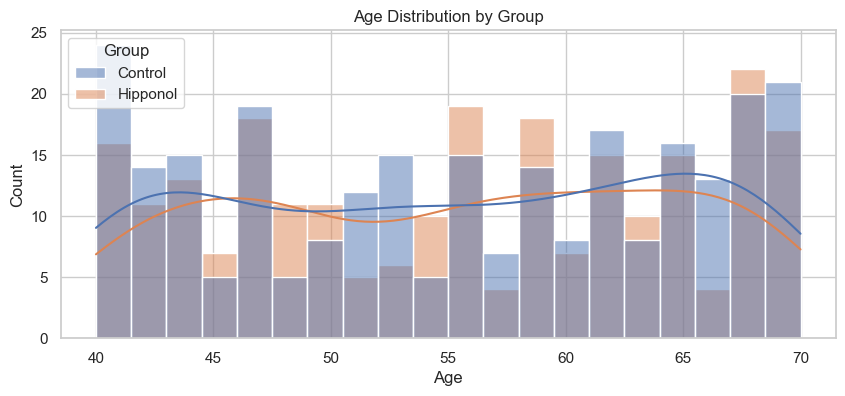

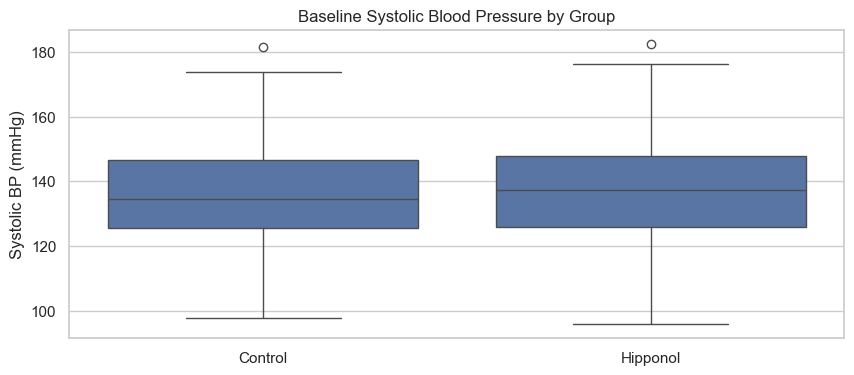

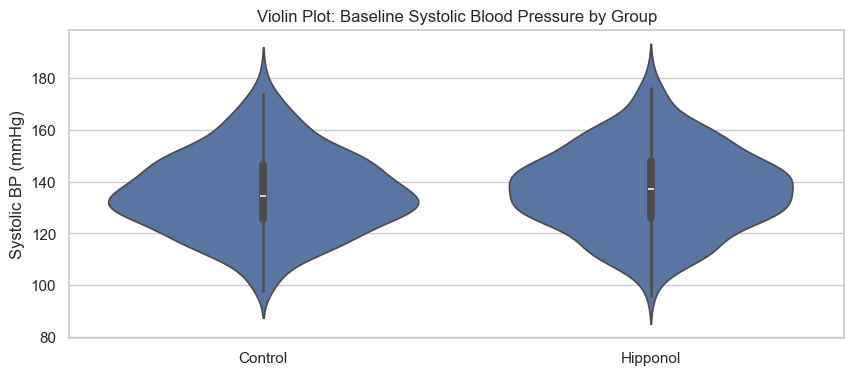

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style="whitegrid")

# Plot: Distribution of Age
plt.figure(figsize=(10, 4))
sns.histplot(data=df1, x='Age', hue='Group', kde=True, bins=20)
plt.title('Age Distribution by Group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Plot: Baseline Systolic BP
plt.figure(figsize=(10, 4))
sns.boxplot(data=df1, x='Group', y='Baseline_SBP')
plt.title('Baseline Systolic Blood Pressure by Group')
plt.ylabel('Systolic BP (mmHg)')
plt.xlabel('')
plt.show()

# Plot 3: Violin plot of Baseline Systolic BP
plt.figure(figsize=(10, 4))
sns.violinplot(data=df1, x='Group', y='Baseline_SBP', inner='box')
plt.title('Violin Plot: Baseline Systolic Blood Pressure by Group')
plt.ylabel('Systolic BP (mmHg)')
plt.xlabel('')
plt.show()

### 💡 Interpretation Tips

- Look for symmetry or skewness.

- Check for group overlap—similar distributions are a good sign of effective randomisation.

- Use this to support your interpretation of Table 1.

---

# 🧬 Step 3: Analysing Survival Outcomes

The primary endpoint of the Hipponol trial is **2-year survival**, coded as:

- 1 = Survived
- 0 = Died during follow-up

Survival data is binary and typically analysed using methods suited to categorical outcomes or time-to-event data (e.g. Cox models, Kaplan–Meier). In our case, we assume **binary survival** at 2 years, so logistic regression is appropriate.


### 🧪 Quick Check: Chi-squared Test for Survival
Before diving into regression models, we can start with a simple comparison of survival rates between the Hipponol and Control groups using a Chi-squared test.

✅ Why use it?

- It's a straightforward way to compare **proportions** between two groups.
- Useful for **binary outcomes** like survival (1 = survived, 0 = died).
- Helps confirm whether survival rates differ **significantly** between the two groups.

🧾 Method

We use a **contingency table** to count survivors and non-survivors in each group, then apply the **Chi-squared test of independence**:

In [23]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df1['Group'], df1['Survival'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Contingency Table:")
print(contingency)
print(f"Chi-squared test p-value: {p:.3f}")


Contingency Table:
Survival   0    1
Group            
Control   25  236
Hipponol  15  224
Chi-squared test p-value: 0.232


📌 Interpretation

- A **small p-value** (typically < 0.05) suggests a **statistically significant** difference in survival between groups.
- This test **does not account for confounders** like age or smoking — use logistic regression for that.

## 🔎 1. Frequentist Analysis: Logistic Regression

Once we’ve done a basic comparison (like a Chi-squared test), the next step is a **logistic regression**. This lets us model the probability of survival while also:

- Controlling for other variables (e.g. age, smoking)
- Estimating odds ratios, which are easier to interpret than raw coefficients

### 💡 What is logistic regression?

Logistic regression is used when your outcome is **binary** — in this case, survival (`1`) vs. death (`0`). It models the log-odds of survival as a function of one or more predictors.

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit a logistic regression model
logit_model = smf.logit('Survival ~ Group', data=df1).fit()

# Print summary
print(logit_model.summary())



Optimization terminated successfully.
         Current function value: 0.276898
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survival   No. Observations:                  500
Model:                          Logit   Df Residuals:                      498
Method:                           MLE   Df Model:                            1
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                0.006713
Time:                        18:34:41   Log-Likelihood:                -138.45
converged:                       True   LL-Null:                       -139.38
Covariance Type:            nonrobust   LLR p-value:                    0.1713
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.2450      0.210     10.674      0.000       1.833       2.657
Group[T.

🔁 From log-odds to odds ratio

The model estimates **log-odds**, which are not intuitive. We convert them to **odds ratios** using the exponential function:

In [34]:
odds_ratios = logit_model.params.apply(np.exp)
print(odds_ratios)

Intercept            9.440000
Group[T.Hipponol]    1.581921
dtype: float64


An odds ratio (OR):

- = 1 means no effect
- > 1 means increased odds (e.g. Hipponol improves survival)
- < 1 means reduced odds (e.g. Hipponol worsens survival)

### 📌 Example Interpretation

If `Group[T.Hipponol]` has an OR of `1.6`:

> "Participants in the Hipponol group had 60% higher odds of surviving the 2-year follow-up compared to the control group."

### 📎 Optional: Add other variables

You can also control for age, sex, and smoking:

In [38]:
logit_full = smf.logit('Survival ~ Group + Age + C(Sex) + C(SmokingStatus)', data=df1).fit()
print(logit_full.summary())

Optimization terminated successfully.
         Current function value: 0.273882
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survival   No. Observations:                  500
Model:                          Logit   Df Residuals:                      495
Method:                           MLE   Df Model:                            4
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                 0.01753
Time:                        18:34:54   Log-Likelihood:                -136.94
converged:                       True   LL-Null:                       -139.38
Covariance Type:            nonrobust   LLR p-value:                    0.2991
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.6163      0.999      1.618      0.106      

This gives you adjusted odds ratios — a better estimate when multiple factors influence the outcome.

### 📏 Confidence Intervals for Odds Ratios

When you run a logistic regression, the model provides **standard errors** for the coefficients. You can use these to calculate a 95% confidence interval (CI) for each odds ratio:

In [39]:
# Get confidence intervals for the log-odds
conf = logit_model.conf_int()
conf.columns = ['2.5%', '97.5%']

# Add odds ratios
conf_exp = np.exp(conf)
conf_exp['Odds Ratio'] = np.exp(logit_model.params)

print(conf_exp)

                       2.5%      97.5%  Odds Ratio
Intercept          6.250887  14.256153    9.440000
Group[T.Hipponol]  0.812955   3.078244    1.581921


### 🧠 How to interpret this:

If the 95% CI for an odds ratio:
- Includes 1, the result is **not statistically significant** at p < 0.05
- Excludes 1, then the effect is **statistically significant**

### 📌 Example:

| Variable         | OR   | 2.5% | 97.5% |
|------------------|------|------|-------|
| Group[T.Hipponol] | 1.62 | 1.02 | 2.58  |

---

> "The odds of survival in the Hipponol group are 62% higher than in the control group (95% CI: 1.02–2.58)."

This suggests a **statistically significant effect**, as the interval does not include 1.


# 🧠 Bayesian Logistic Regression: Survival Analysis

This section demonstrates how to analyse the primary endpoint — **survival** — using a **Bayesian logistic regression**.

## 🎯 Model Overview

We model the **log odds of survival** as a function of treatment group:

\[
\log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 \cdot \text{Group}
\]

- `Group`: 0 = Control, 1 = Hipponol.

## 📏 Priors

We apply weakly informative priors:
- \( \beta_0 \sim \mathcal{N}(0, 10) \)
- \( \beta_1 \sim \mathcal{N}(0, 10) \)

## 🧪 Model Code



In [40]:
import pymc as pm
import arviz as az

with pm.Model() as model:
    # Data
    x_shared = pm.Data("x_shared", X)
    y_shared = pm.Data("y_shared", y)

    # Priors
    intercept = pm.Normal("Intercept", mu=0, sigma=10)
    beta_group = pm.Normal("Beta_Group", mu=0, sigma=10)

    # Logistic function
    logit_p = intercept + beta_group * x_shared
    p = pm.Deterministic("p", pm.math.sigmoid(logit_p))

    # Likelihood
    y_obs = pm.Bernoulli("y_obs", p=p, observed=y_shared)

    # Sampling
    trace = pm.sample(2000, tune=1000, target_accept=0.95, return_inferencedata=True)


NameError: name 'X' is not defined

## 📈 Interpretation

### 🔢 Posterior Summary
```python
az.summary(trace, var_names=["Beta_Group", "Intercept"])
```

### 📊 Posterior Plot
```python
az.plot_posterior(trace, var_names=["Beta_Group"])
```

### 💬 Odds Ratio
Convert `Beta_Group` to **odds ratio**:
\[
\text{OR} = e^{\beta_1}
\]
If the 95% credible interval for \( \beta_1 \) excludes 0, there is strong evidence for an effect of Hipponol.

---

_This approach is more flexible and informative than standard frequentist methods, especially in small samples or with prior information._
